In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_Transient_NS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H2.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.18 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
# Path to the directory containing CSV files
csv_directory = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/Circumferential Crack'
# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df['Value'])

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df["LeakType"] = "Circumferential Crack"

# Rename columns
df = df.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [4]:
# Path to the directory containing CSV files
csv_directory1 = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/Gasket Leak'

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory1) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory1, file)
    df1 = pd.read_csv(file_path)
    dataframes.append(df1['Value'])

# Concatenate all DataFrames into a single DataFrame
df1 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df1["LeakType"] = "Gasket Leak"

# Rename columns
df1 = df1.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [5]:
# Path to the directory containing CSV files
csv_directory2 = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/Longitudinal Crack'

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory2) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory2, file)
    df2 = pd.read_csv(file_path)
    dataframes.append(df2['Value'])

# Concatenate all DataFrames into a single DataFrame
df2 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df2["LeakType"] = "Longitudinal Crack"

# Rename columns
df2 = df2.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [6]:
# Path to the directory containing CSV files
csv_directory3 = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/NonLeak"

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory3) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory3, file)
    df3 = pd.read_csv(file_path)
    dataframes.append(df3['Value'])

# Concatenate all DataFrames into a single DataFrame
df3 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df3["LeakType"] = "NonLeak"

# Rename columns
df3 = df3.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [7]:
# Path to the directory containing CSV files
csv_directory4 = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Looped/Orifice Leak"

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory4) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory4, file)
    df4 = pd.read_csv(file_path)
    dataframes.append(df4['Value'])

# Concatenate all DataFrames into a single DataFrame
df4 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df4["LeakType"] = "Orifice Leak"

# Rename columns
df4 = df4.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [8]:
data = pd.concat([df, df1, df2, df3, df4], axis=0)
data = data.sample(frac = 1)
data

Value1       Value2      Value3      Value4       Value5  \
327261 -1620.300229   728.770789  365.240993  195.014264  -662.151259   
880690   -78.723254 -6190.449321  -21.468849 -152.474692  3386.790293   
853671    31.756849    55.193830 -187.571320  301.392049  -195.011158   
625798  -467.131320    -0.038881  170.293273 -321.731007  -217.935645   
545626   -62.711429 -3249.472234   33.036052 -475.865043 -2998.798952   
...             ...          ...         ...         ...          ...   
244494 -1074.491237  3238.772910 -141.638407   24.787536  1287.248304   
956092 -1685.114025          NaN         NaN         NaN          NaN   
490252  -867.708255   118.675057   -2.950121  300.329528   157.329867   
873803  -325.855266  2180.093083  -78.561519   90.937400  5399.695934   
627910  -448.612593    -8.368264 -148.217904 -501.985344 -2746.899683   

             Value6       Value7       Value8               LeakType  
327261  -190.886900   239.087218  -150.751609  Circumferential Crack  
880690  3422.016959   431.428304   116.491626           Orifice Leak  
853671 -4075.459907  -136.462867  -401.016229            Gasket Leak  
625798  -395.049764   553.945177   299.980675                NonLeak  
545626  4755.726324  2081.360339   118.998528           Orifice Leak  
...             ...          ...          ...                    ...  
244494   197.359431    -7.640454  4092.467867  Circumferential Crack  
956092          NaN          NaN          NaN  Circumferential Crack  
490252   135.638734 -2052.787235  -125.251099            Gasket Leak  
873803 -2454.052480  1488.473482   258.738094           Orifice Leak  
627910    32.247243  -438.367938   -33.518152                NonLeak  

[4905106 rows x 9 columns]

In [9]:
data.describe()

Value1        Value2        Value3        Value4        Value5  \
count  4.712852e+06  4.606974e+06  4.637235e+06  4.784074e+06  4.665362e+06   
mean  -2.358376e+00  4.609650e+00 -8.433927e+00  1.058816e+01  3.768234e+00   
std    9.906643e+02  1.878771e+03  2.030231e+02  8.425780e+02  2.348000e+03   
min   -8.641931e+03 -2.300951e+04 -5.213992e+03 -1.478052e+04 -2.152459e+04   
25%   -2.400545e+02 -1.881033e+02 -1.317725e+02 -2.127212e+02 -5.006915e+02   
50%   -2.114538e+01  7.562693e+00 -3.839667e+00 -1.817972e+00 -2.033670e+01   
75%    2.140991e+02  1.919413e+02  1.217480e+02  1.935586e+02  4.689135e+02   
max    1.120452e+04  2.247580e+04  2.945108e+03  1.374703e+04  2.374306e+04   

             Value6        Value7        Value8  
count  4.622568e+06  4.611324e+06  4.590281e+06  
mean  -3.730666e+00  1.842626e+01  8.800204e+00  
std    1.994028e+03  1.495031e+03  1.034681e+03  
min   -1.284044e+04 -1.293942e+04 -9.113854e+03  
25%   -6.968058e+02 -2.601096e+02 -2.346091e+02  
50%   -2.567397e+01  5.136659e+00  6.592279e+00  
75%    5.872103e+02  2.573633e+02  2.564738e+02  
max    1.297441e+04  1.309954e+04  8.668093e+03

In [10]:
data.isna()
data = data.dropna()
print(data.describe())

             Value1        Value2        Value3        Value4        Value5  \
count  4.547302e+06  4.547302e+06  4.547302e+06  4.547302e+06  4.547302e+06   
mean  -2.081407e+00  4.582146e+00 -8.671939e+00  1.077368e+01  3.983489e+00   
std    1.004186e+03  1.882684e+03  2.035390e+02  8.620250e+02  2.343808e+03   
min   -8.641931e+03 -2.300951e+04 -5.213992e+03 -1.478052e+04 -2.152459e+04   
25%   -2.425614e+02 -1.898197e+02 -1.323618e+02 -2.177350e+02 -5.090665e+02   
50%   -2.252013e+01  7.320090e+00 -3.551550e+00 -2.489028e+00 -1.993236e+01   
75%    2.166060e+02  1.901542e+02  1.219098e+02  1.957421e+02  4.748282e+02   
max    1.120452e+04  2.247580e+04  2.945108e+03  1.374703e+04  2.374306e+04   

             Value6        Value7        Value8  
count  4.547302e+06  4.547302e+06  4.547302e+06  
mean  -3.820926e+00  1.897398e+01  8.602857e+00  
std    2.001120e+03  1.500628e+03  1.039427e+03  
min   -1.284044e+04 -1.293942e+04 -9.113854e+03  
25%   -7.072675e+02 -2.567942e+02 -2.3

In [11]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
data.drop_duplicates(inplace=True)
data.describe()

Value1        Value2        Value3        Value4        Value5  \
count  4.547302e+06  4.547302e+06  4.547302e+06  4.547302e+06  4.547302e+06   
mean  -2.081407e+00  4.582146e+00 -8.671939e+00  1.077368e+01  3.983489e+00   
std    1.004186e+03  1.882684e+03  2.035390e+02  8.620250e+02  2.343808e+03   
min   -8.641931e+03 -2.300951e+04 -5.213992e+03 -1.478052e+04 -2.152459e+04   
25%   -2.425614e+02 -1.898197e+02 -1.323618e+02 -2.177350e+02 -5.090665e+02   
50%   -2.252013e+01  7.320090e+00 -3.551550e+00 -2.489028e+00 -1.993236e+01   
75%    2.166060e+02  1.901542e+02  1.219098e+02  1.957421e+02  4.748282e+02   
max    1.120452e+04  2.247580e+04  2.945108e+03  1.374703e+04  2.374306e+04   

             Value6        Value7        Value8  
count  4.547302e+06  4.547302e+06  4.547302e+06  
mean  -3.820926e+00  1.897398e+01  8.602857e+00  
std    2.001120e+03  1.500628e+03  1.039427e+03  
min   -1.284044e+04 -1.293942e+04 -9.113854e+03  
25%   -7.072675e+02 -2.567942e+02 -2.371433e+02  
50%   -2.749914e+01  5.621866e+00  5.540998e+00  
75%    5.966912e+02  2.554225e+02  2.592999e+02  
max    1.297441e+04  1.309954e+04  8.668093e+03

In [13]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = data.select_dtypes(include=['float64']).apply(zscore)

# Define a threshold for identifying outliers (adjust as needed)
threshold = 3

# Identify and remove outliers
data_no_outliers = data[(z_scores.abs() < threshold).all(axis=1)]

# Compare shapes to see how many outliers were removed
print("Original shape:", data.shape)
print("Data without outliers shape:", data_no_outliers.shape)

# Check for missing values after removing outliers
missing_values_after = data_no_outliers.isna().sum()
print("Missing values after removing outliers:")
print(missing_values_after)

Original shape: (4547302, 9)
Data without outliers shape: (3849795, 9)
Missing values after removing outliers:
Value1      0
Value2      0
Value3      0
Value4      0
Value5      0
Value6      0
Value7      0
Value8      0
LeakType    0
dtype: int64


In [14]:
label_encoder = LabelEncoder()
data['category_label_encoded'] = label_encoder.fit_transform(data['LeakType'])

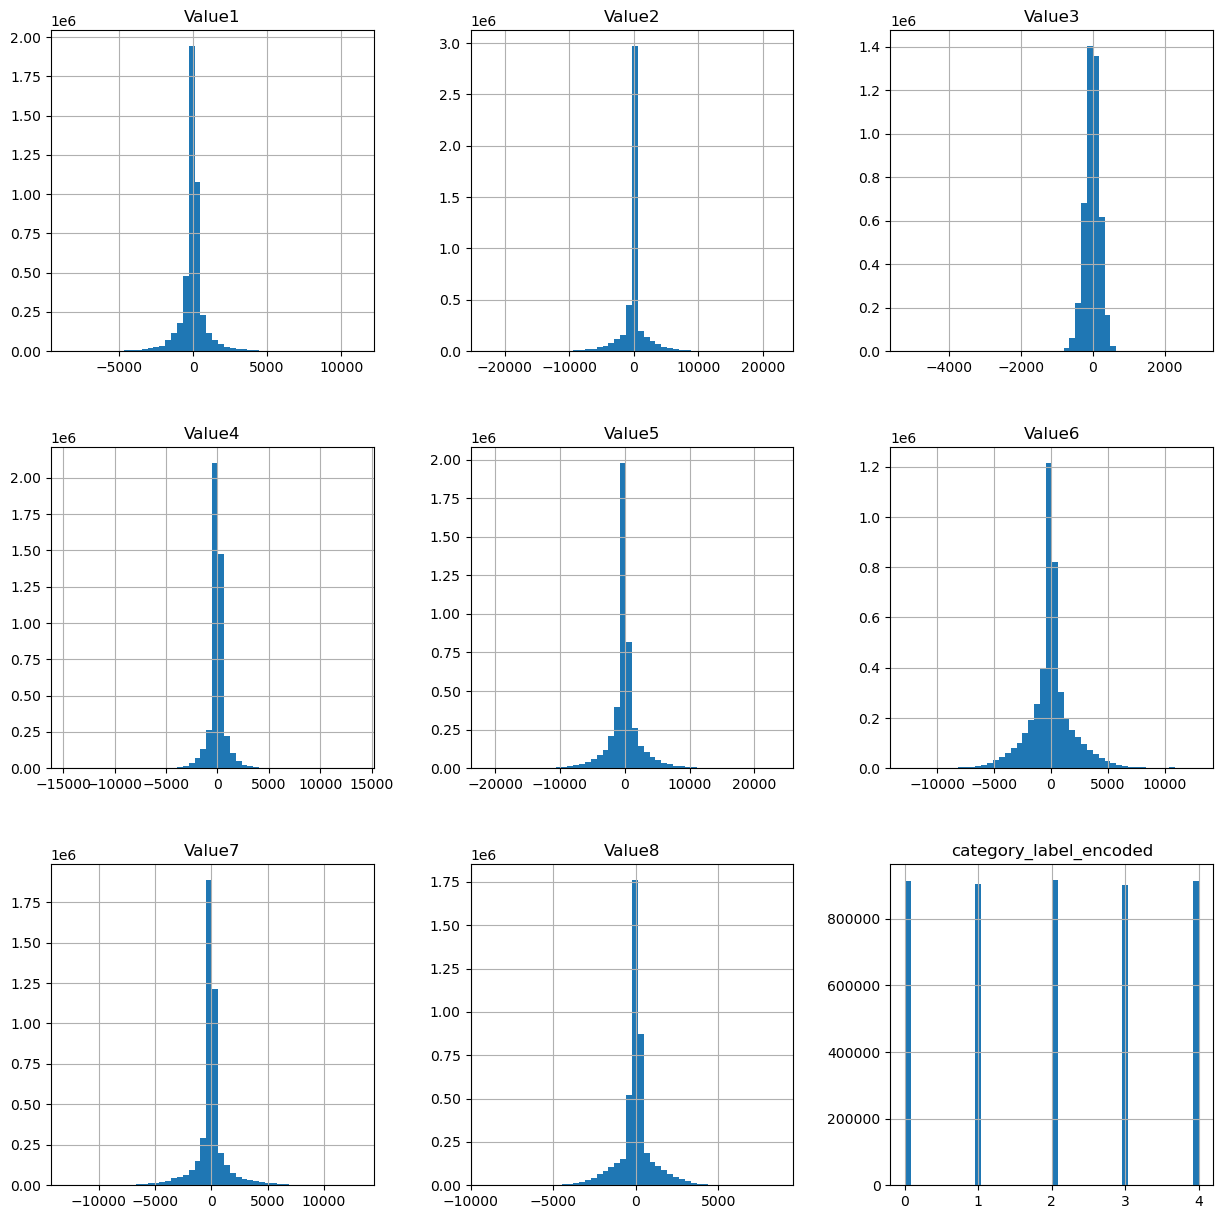

In [15]:
data.hist(bins=50, figsize=(15,15))
plt.show()

In [16]:
# Calculate summary statistics
summary_stats = data.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
skewness = data.skew()
kurtosis = data.kurtosis()
correlation_matrix = data.corr()

# Count missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

# Print or analyze the calculated statistics as needed
print(summary_stats)
print(skewness)
print(kurtosis)
print(correlation_matrix)
print(missing_values)
print(missing_percent)

             Value1        Value2        Value3        Value4        Value5  \
count  4.547302e+06  4.547302e+06  4.547302e+06  4.547302e+06  4.547302e+06   
mean  -2.081407e+00  4.582146e+00 -8.671939e+00  1.077368e+01  3.983489e+00   
std    1.004186e+03  1.882684e+03  2.035390e+02  8.620250e+02  2.343808e+03   
min   -8.641931e+03 -2.300951e+04 -5.213992e+03 -1.478052e+04 -2.152459e+04   
10%   -7.432949e+02 -1.420138e+03 -2.632154e+02 -6.158090e+02 -2.165106e+03   
25%   -2.425614e+02 -1.898197e+02 -1.323618e+02 -2.177350e+02 -5.090665e+02   
50%   -2.252013e+01  7.320090e+00 -3.551550e+00 -2.489028e+00 -1.993236e+01   
75%    2.166060e+02  1.901542e+02  1.219098e+02  1.957421e+02  4.748282e+02   
90%    6.284657e+02  1.431833e+03  2.442628e+02  6.040471e+02  2.215565e+03   
max    1.120452e+04  2.247580e+04  2.945108e+03  1.374703e+04  2.374306e+04   

             Value6        Value7        Value8  category_label_encoded  
count  4.547302e+06  4.547302e+06  4.547302e+06         

<Figure size 1200x800 with 0 Axes>

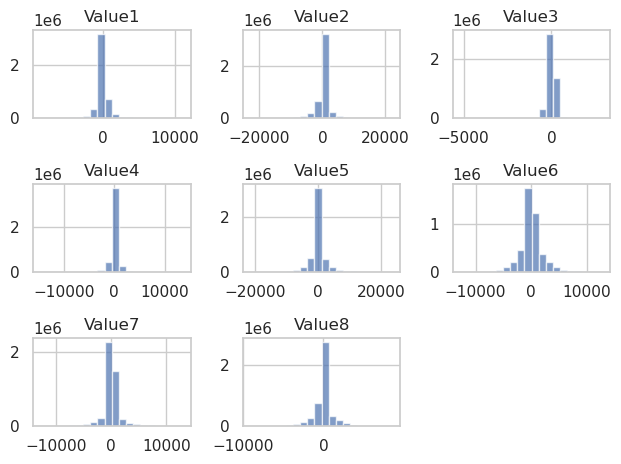

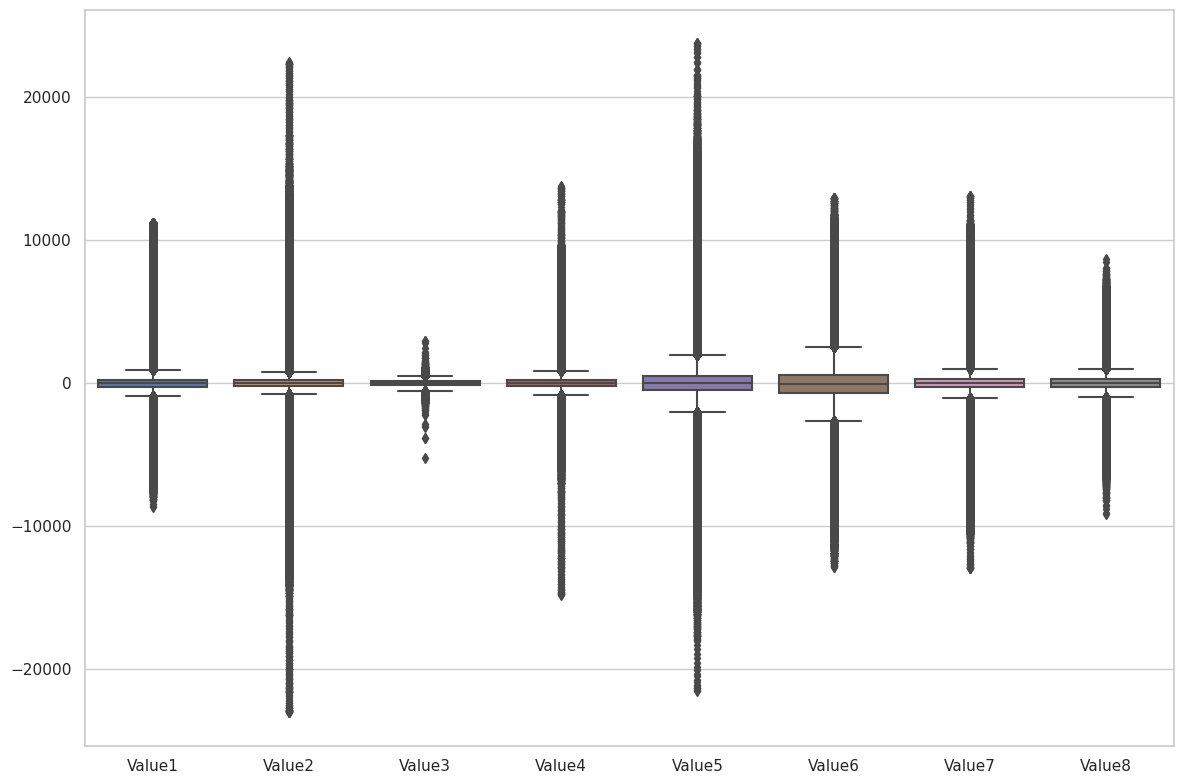

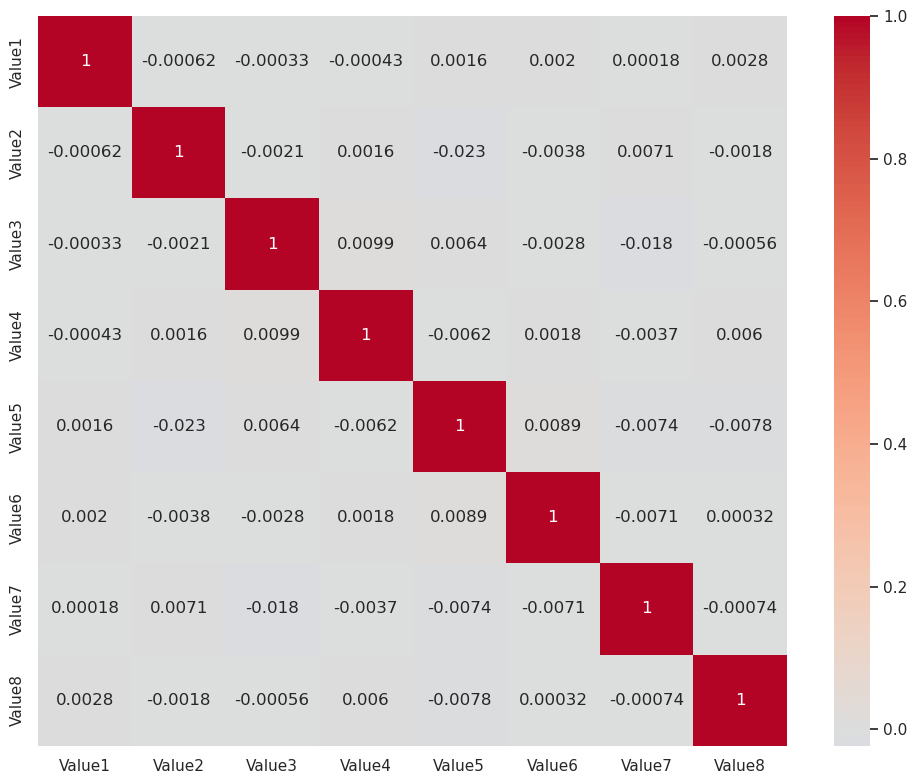

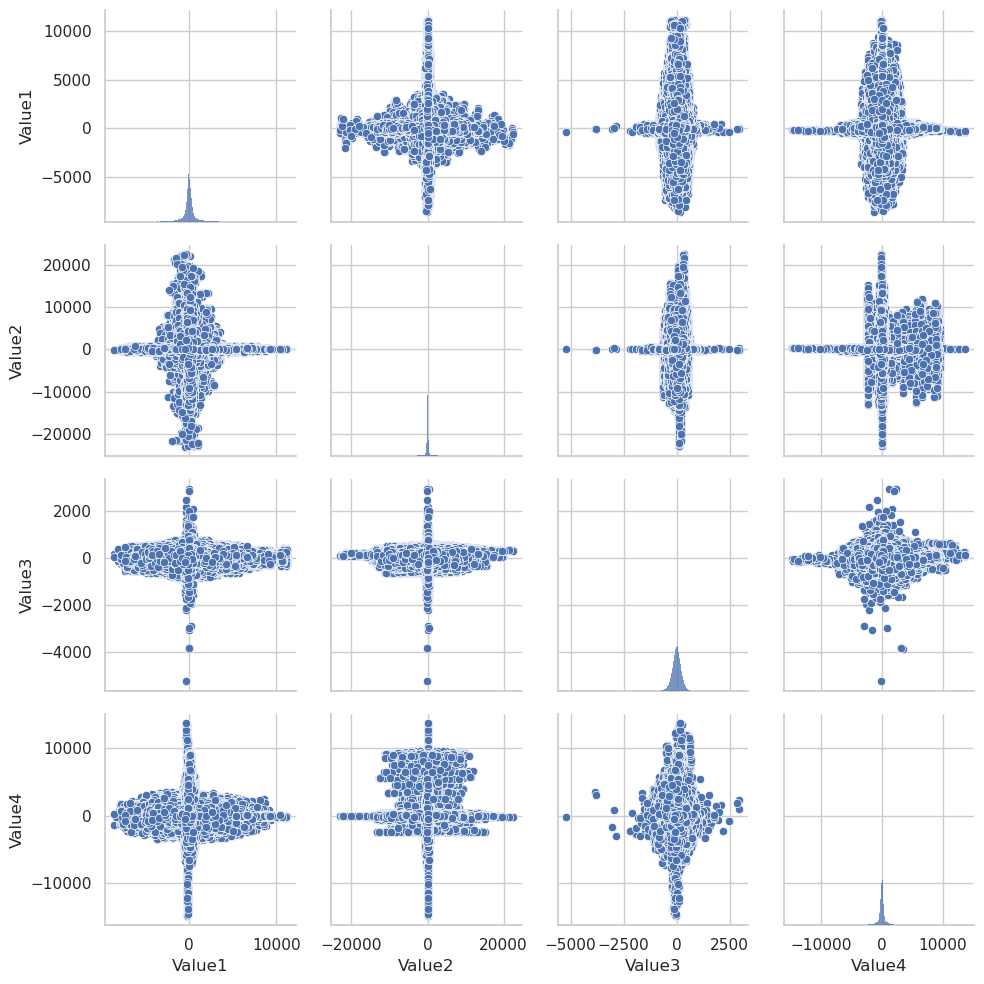

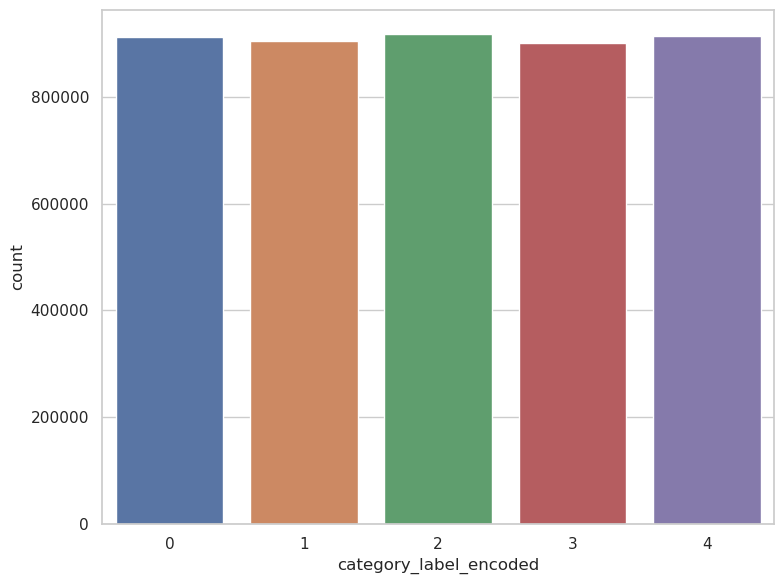

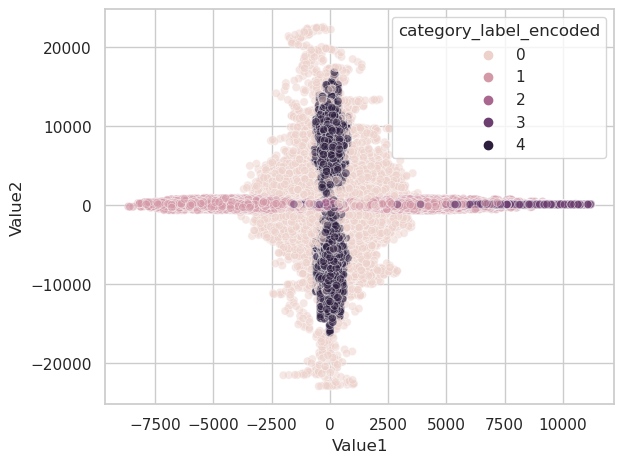

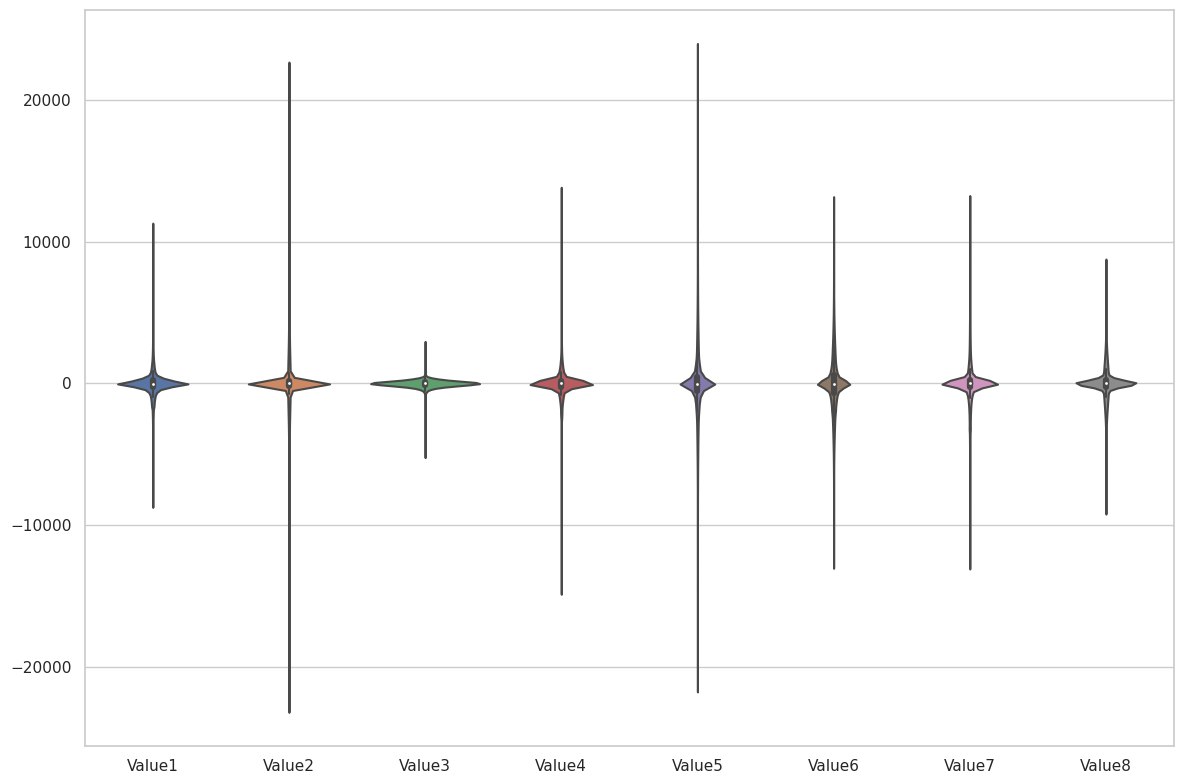

In [17]:
# Set style for Seaborn plots
sns.set(style="whitegrid")

# Histograms
numerical_columns = ['Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Value6', 'Value7', 'Value8']
plt.figure(figsize=(12, 8))
data[numerical_columns].hist(bins=20, alpha=0.7)
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns])
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.tight_layout()
plt.show()

# Pair Plots (select a subset if there are too many variables)
sns.pairplot(data[numerical_columns[:4]])
plt.tight_layout()
plt.show()

# Bar Plots (for categorical variables)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='category_label_encoded')
plt.tight_layout()
plt.show()

# Scatter Plots (for pairs of numerical variables)
sns.scatterplot(data=data, x='Value1', y='Value2', hue='category_label_encoded', alpha=0.5)
plt.tight_layout()
plt.show()

# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=data[numerical_columns])
plt.tight_layout()
plt.show()

In [18]:
# Assuming you have already preprocessed your data and split it into X and y
X = data.drop(['LeakType', 'category_label_encoded'], axis=1)  # Features
y = data['category_label_encoded']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize features (Z-score scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Build DNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Output layer, 5 for the number of unique categories

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_data=(X_test_scaled, y_test))

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test_scaled)

# Optionally, you can convert the predicted probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

Epoch 1/20
 35336/227366 [===>..........................] - ETA: 4:45 - loss: 0.2293 - accuracy: 0.9080


KeyboardInterrupt

